# 결정트리와 앙상블(ensemble)
#### 결정트리는 다른 모델에 비해서 부적확정을 가진다. 하지만 앙상블을 사용해서 좋은 머신러닝 모델을 만들 수 있다. 

#### 앙상블: 수많은 모델들을 만들고 이 모델들의 예측을 합쳐서 종합적인 예측을 하는 기법

# 랜덤 포레스트: 
#### 트리 모델들을 임의로 많이 만들어서 다수결 투표로 결과를 종합하는 알고리즘
# Bagging:
갖고 있는 데이터 셋으로 다른 데이터 셋을 만들어내고(bootstrap), 모델들의 결정을 합치는(aggregating) 알고리즘
모델을 만들 때에는 임의로 속성 두 개를 선택한다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [4]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns= ['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [5]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

0.9

In [11]:
importances = model.feature_importances_

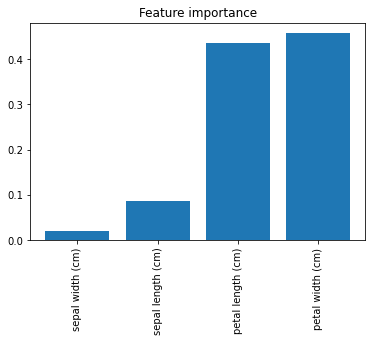

In [12]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importance")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

### 랜덤포레스트 vs 결정트리
https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

# Boosting
1. 일부러 성능이 안좋은 모델들을 사용한다.
2. 더 먼저 만든 모델들의 성능이, 뒤에 있는 모델이 사용할 데이터 셋을 바꾼다.
3. 모델들의 예측을 종합할 때, 성능이 좋은 모델의 예측을 더 반영한다.

## 에이다 부스트(Adaboost)
1. 성능이 별로 좋지 않은 결정 스텀프들을 많이 만듭니다.
2. 스텀프를 만들 때, 전 스텀프들이 예측에 틀린 데이터들의 중요도를 더 높게 설정해 줍니다.
3. 최종 결정을 내릴 때, 성능이 좋은 결정 스텀프들 예측 의견의 비중은 높고, 그렇지 않은 결정 스텀프의 의견의 비중은 낮게 반영합니다.
https://ekdud7667.tistory.com/entry/Adaboost%EC%97%90%EC%9D%B4%EB%8B%A4%EB%B6%80%EC%8A%A4%ED%8A%B8

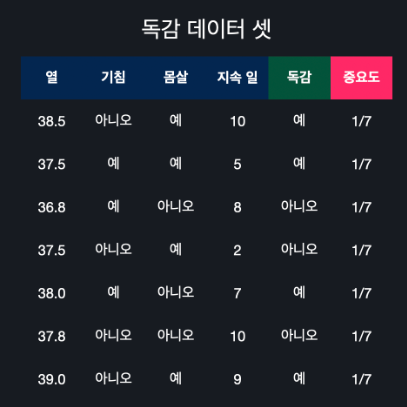
1. 스텀프는 결정 트리를 만들 때랑 똑같이 지니 불순도를 이용해서 만듭니다.
2. 모든 데이터에는 중요도라는 게 있습니다. 이 중요도는 에다 부스트 알고리즘에서 계속 사용할 건데요. 일단 이번 레슨에서는 스텀프의 오류, total_error를 계산할 때 사용했습니다. total error는 틀리게 예측한 모든 데이터 중요도의 합입니다.
3. 이 total_error는 스텀프의 성능을 계산하는 데 사용됩니다.
# 스텀프성능 계산
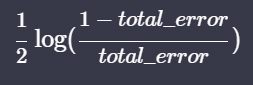

# 중요도 갱신
#### Ptree= 스텀프 성능
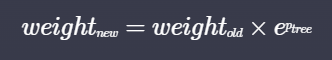
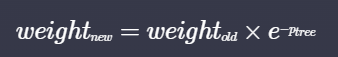

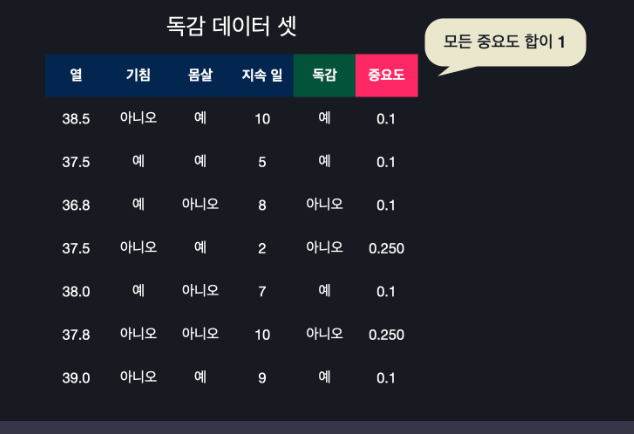

# 스텀프 추가하기
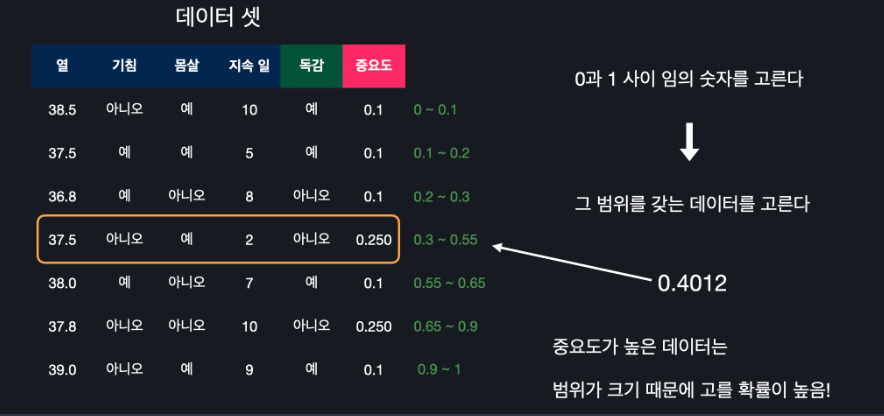
1. 0~1 사이의 임의의 숫자를 선택하는 것을 데이터셋의 크기만큼 반복하고 새로운 데이터셋을 만든다
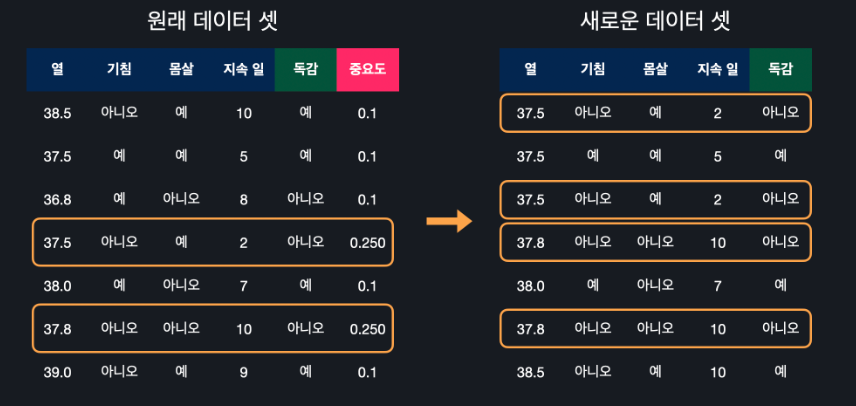
2. 새로운 데이터셋에서 지금 까지 했던 수행을 반복한다. (점점 개선됨)

#### 3. 에이다 부스트에서는 성능을 기준으로 판단함!

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [17]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns= ['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [19]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

0.8666666666666667

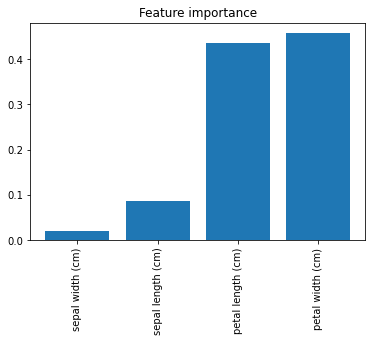

In [20]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importance")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()